# Proyecto Final

MA4402 - Simulación Estocástica: Teoría y Laboratorio

Profesor: Joaquín Fontobona T.

Auxiliares: Catalina Lizana, Álvaro Márquez, Matías Ortiz

- Joao Lisboa
- Ian Rivera


In [1]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns
import pandas as pd
M=np.array([[0, 1, 2, 3], [2, 3, 4]], dtype=object)
rd.choice(M[1])

4

In [69]:
def ciudades():
    C = (
    (-33.629383,-70.703094),
    (-33.596447,-70.651855),
(-33.384586, -70.818328),
(-33.321774,-70.724564),
(-33.294320,-70.729349),
(-33.620875,-70.699457),
(-33.637170,-70.699795),
(-33.314915,-70.722374),
(-33.084228,-70.924168),
(-33.486571,-70.687239),
(-33.556304,-70.721805),
(-33.486403,-70.703002),
(-33.279453,-70.748245),
(-33.479534,-70.639702),
(-33.490749,-70.711998),
(-33.330429,-70.716965),
(-33.5372260772981,-70.7028201912576), #Hasta aca Valorizacion #17
    (-33.612252,-70.859749),
(-33.286247,-70.745674),
(-33.402831,-70.711270),
(-33.466457,-70.690933),
(-33.583835,-70.668971),
(-33.489429,-70.723579),
(-33.369526,-70.671043),
(-33.369526,-70.671043),
(-33.551018,-70.602364),
(-33.680344,-71.210785),
(-33.513153,-70.634314),
(-33.397855,-70.694833),
(-33.57024,-70.708321),
(-33.443745,-70.703949),
(-33.332466,-70.69812),
(-33.390453,-70.694603),
(-33.477497,-70.668236),
(-33.451462,-70.703308),
(-33.659397,-70.92141),
(-33.377846,-70.664795),
(-33.453637,-70.689865),
(-33.474377,-70.36194),
(-33.286247,-70.745674),
(-33.7282645,-70.74317381),
(-33.2663216,-70.74526183),
(-33.286421,-70.872977),
(-33.490448,-70.72644),
(-33.60938789,-70.86074273),
(-33.471169,-70.701897),
(-33.52496718,-70.63168705),
(-33.392925,-70.671463),
(-33.382698,-70.774719), #Hasta aca Intermediarios #32
    )
    #total=32+17=49
    C=np.array(C)
    D = np.zeros((49,49)) #Matriz de distancia
    for i in range(49):
        for j in range(49):
            D[i,j]=np.sqrt((C[j][0]-C[i][0])**2+(C[j][1]-C[i][1])**2)
    A=np.zeros((32,2)) #Matriz de indices A[i]=(x,y) indica que la empresa intermediaria i tiene de deposito a x, a una distancia y
    for i in range(32):
        #####3
        dist=D[17+i,0] #distancia de intermediaria i a valorización 1
        ind=1
        for j in range(16):
            aux=D[17+i,j+1]
            if aux<dist:
                dist=aux
                ind=j+1
        #####
        #auxi=D[17+i,:17]
        #dist=np.amin(auxi)
        #ind=np.where(auxi == dist)[0][0]
        #print(ind)
        #####
        A[i,0]=int(ind)+1
        A[i,1]=dist
    dtot=np.zeros(17)
    for i in range(17):
        for j in range(32):
            if A[j,0]==i+1:
                dtot[i]+=A[j, 1]
    return (D,C,A,dtot)
    
def act_perm(A):
    P=[]
    for i in range(17):
        aux = np.where(A[:,0]==i+1)[0]
        P.append(aux) #Permutaciones indican el camino a seguir
    return P

CapacV=12
D,C,A,dtot= ciudades()
P=act_perm(A)
distancia_total=0
for i in range(17):
    if len(P[i])!=0:
        for j in range(len(P[i])-1):
            if j==0:
                distancia_total+=D[i,17+P[i][j]]
            else:
                distancia_total+=D[17+P[i][j],17+P[i][j+1]]
D[7,17:]

array([0.32753806, 0.03694244, 0.08861446, 0.15476923, 0.2741712 ,
       0.17451816, 0.0749482 , 0.0749482 , 0.26485284, 0.60998661,
       0.21691673, 0.08739308, 0.25571144, 0.13014088, 0.02993817,
       0.08048116, 0.17135877, 0.13787166, 0.39784818, 0.08529743,
       0.14248027, 0.39413297, 0.03694244, 0.41387249, 0.05371379,
       0.15327482, 0.17558009, 0.32536163, 0.15759004, 0.22879257,
       0.09315305, 0.08564189])

[array([], dtype=int64), array([ 4,  8, 18], dtype=int64), array([ 9, 25, 31], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([23], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([ 3, 16, 20], dtype=int64), array([ 0, 12, 27], dtype=int64), array([13, 17, 28], dtype=int64), array([ 1, 22, 24], dtype=int64), array([10, 21, 29], dtype=int64), array([ 5, 26], dtype=int64), array([ 2,  6,  7, 11, 14, 15, 19, 30], dtype=int64), array([], dtype=int64)]


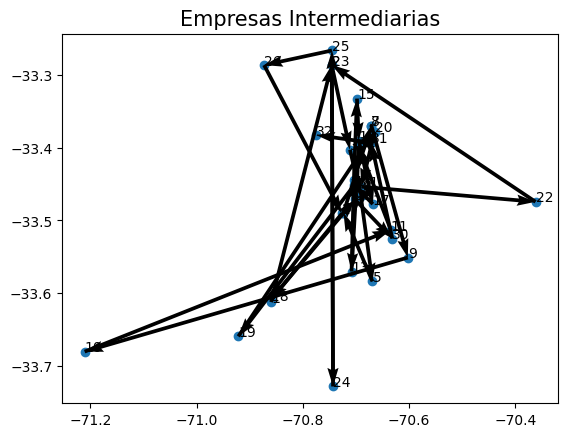

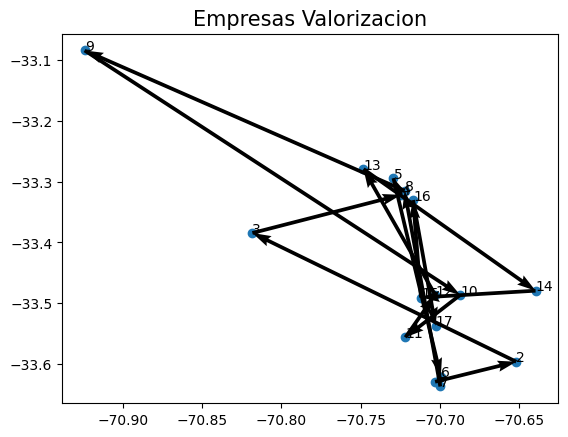

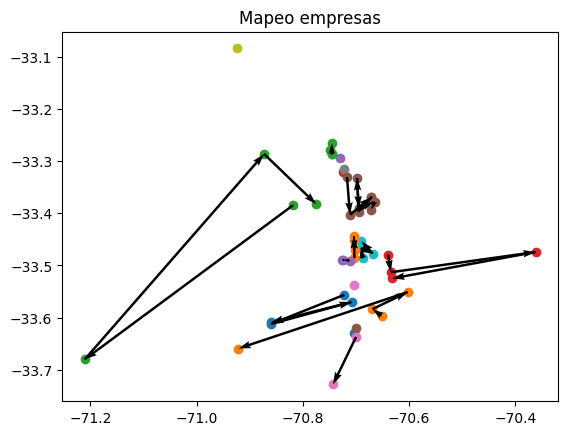

<Figure size 2000x2000 with 0 Axes>

(array([ 4,  8, 18], dtype=int64),)


3

In [70]:
#Recibe el retorno de la funcion ciudades y una permutacion (Las permutaciones se entienden como un vector de numeros enteros)
def graf_valori(pos_Citys, perm):
    x=np.zeros(17)
    y=np.zeros(17)
    x_perm=np.zeros(17)
    y_perm=np.zeros(17)
    for i in range(17):
        y[i]=pos_Citys[i][0]
        x[i]=pos_Citys[i][1]
        
    for i in range(17):
        x_perm[i]=x[perm[i]]
        y_perm[i]=y[perm[i]]
        plt.annotate(str(perm[i]+1), (x_perm[i], y_perm[i]))
        
    plt.scatter(x_perm,y_perm)
    plt.quiver(x_perm[:-1], y_perm[:-1], x_perm[1:]-x_perm[:-1], y_perm[1:]-y_perm[:-1], scale_units='xy', angles='xy', scale=1)
    plt.title("Empresas Valorizacion",fontsize=15)
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    plt.show()

def graf_interm(pos_Citys, perm):
    x=np.zeros(32)
    y=np.zeros(32)
    x_perm=np.zeros(32)
    y_perm=np.zeros(32)
    for i in range(32):
        y[i]=pos_Citys[17+i][0]
        x[i]=pos_Citys[17+i][1]
        
    for i in range(32):
        x_perm[i]=x[perm[i]]
        y_perm[i]=y[perm[i]]
        plt.annotate(str(perm[i]+1), (x_perm[i], y_perm[i]))
        
    plt.scatter(x_perm,y_perm)
    plt.quiver(x_perm[:-1], y_perm[:-1], x_perm[1:]-x_perm[:-1], y_perm[1:]-y_perm[:-1], scale_units='xy', angles='xy', scale=1)
    plt.title("Empresas Intermediarias",fontsize=15)
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    plt.show()

def graf_sol(C, P, val):
    x=np.zeros(len(P[val])+1)
    y=np.zeros(len(P[val])+1)
    x_perm=np.zeros(len(P[val])+1)
    y_perm=np.zeros(len(P[val])+1)
    perm=P[val]
    for i in range(len(P[val])+1):
        if i==0:
            y_perm[i]=C[val][0]
            x_perm[i]=C[val][1]
        else:
            print(perm[i-1])
            y_perm[i]=C[17+perm[i-1]][0]
            x_perm[i]=C[17+perm[i-1]][1]
    #print(x_perm)

    plt.scatter(x_perm,y_perm)
    plt.quiver(x_perm[:-1], y_perm[:-1], x_perm[1:]-x_perm[:-1], y_perm[1:]-y_perm[:-1], scale_units='xy', angles='xy', scale=1)
    plt.title("Cluster empresa valorización %i" %val)
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    plt.show()

    
def graf_total(C, P):
    for val in range(17):
        x=np.zeros(len(P[val])+1)
        y=np.zeros(len(P[val])+1)
        x_perm=np.zeros(len(P[val])+1)
        y_perm=np.zeros(len(P[val])+1)
        perm=P[val]
        for i in range(len(P[val])+1):
            if i==0:
                y_perm[i]=C[val][0]
                x_perm[i]=C[val][1]
            else:
                #print(perm[i-1])
                y_perm[i]=C[17+perm[i-1]][0]
                x_perm[i]=C[17+perm[i-1]][1]
        #print(x_perm)

        plt.scatter(x_perm,y_perm)
        plt.quiver(x_perm[:-1], y_perm[:-1], x_perm[1:]-x_perm[:-1], y_perm[1:]-y_perm[:-1], scale_units='xy', angles='xy', scale=1, width=0.005,)
        plt.title("Mapeo empresas")
    plt.figure(figsize=(20,20))
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    plt.show()
    
D,C,A,dtot= ciudades()
permu1=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]#,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
print(P)
graf_interm(C,permu1)
graf_valori(C,permu1)
graf_total(C,P)
aux1 = np.where(A[:,0]==1+1)
print(aux1)
aux1[0].size


In [71]:
def fun(A,CostoIns,P,D):
    distancia_total=0
    for i in range(17):
        if len(P[i])!=0:
            for j in range(len(P[i])-1):
                if j==0:
                    distancia_total+=D[i,17+P[i][j]]
                else:
                    distancia_total+=D[17+P[i][j],17+P[i][j+1]]
    return len(np.unique(A[:,0]))*CostoIns+distancia_total

In [87]:
def abrirdeposito(A0,P0,D):
    A=A0.copy()
    P=P0.copy()
    if len(np.unique(A[:,0]))==17: #No hay depositos cerrados (sin un cliente)
        return A,P
    else:
        l=0
        pos=[]
        while l<17:
            aux1 = np.where(A[:,0]==l+1)[0]
            if aux1.size==0:
                pos.append(l) #lista de posibles depositos a abrir
            l+=1
        i=rd.choice(pos) #Se abre el deposito i al azar
        
        #######
        #dmin=D[i,17]
        #ind=0 #intermediario a cambiar
        #for j in range(31): 
        #    aux2=D[i,j+18]
        #    if aux2<dmin:
        #        dmin=aux2
        #        ind=j+1
        ########
        
        auxi=D[i,17:]
        dmin=np.amin(auxi)
        ind=np.where(auxi == dist)[0][0]
        ####
        A[ind,0]=i+1
        A[ind,1]=dmin
        #print("se saca %i" %ind )
        n=0
        while n<17:
            aux3=np.where(P[n]==ind)[0]
            if aux3.size==0:
                n+=1
            else:
                np.delete(P[n],aux3[0])
                break

        P[i].append(ind)
        #print(P[i])
    return A,P

def cerrardeposito(A0,P0,D):
    print("si se cierra")
    A=A0.copy()
    P=P0.copy()
    if len(np.unique(A[:,0]))==0:
        return A,P
    else:
        l=0
        pos=[]
        while l<17:
            aux1 = np.where(A[:,0]==l+1)[0]
            if aux1.size!=0:
                pos.append(l)
            l+=1
        i=rd.choice(pos)
        #Se elimina el deposito i
        aux2=P[i]
        P[i]=[]
        
        for j in range(len(aux2)):
            ########
            dmin=D[0,17+aux2[j]]
            ind=0
            for n in range(16):
                if n==i:
                    pass
                aux3=D[n,aux2[j]+17]
                if aux3<dmin:
                    dmin=aux3
                    ind=n+1
            #########
            A[j,0]=ind
            A[j,1]=dmin
            np.insert(P[j],0,ind)#se agrega la nueva intermediaria al recorrido
            
    return A,P   

def dosOpt(P0):
    P1=P0.copy()
    n=rd.randint(0,16)
    Pg=P1[n]
    if len(Pg)<=1:
        return P1
    largo=len(Pg)
    i=rd.randint(0,largo-1)
    j=rd.randint(0,largo-1)
    aux=Pg[i]
    Pg[i]=Pg[j]
    Pg[j]=aux
    P1[n]=Pg
    return P1

def Inser(P0):
    P1=P0.copy()
    n=rd.randint(0,16)
    m=rd.randint(0,16)
    Pg=P1[n]
    Pl=P1[m]
    if len(Pg)<=1:
        return P1
    largo=len(Pg)
    i=rd.randint(0,largo-1)
    aux=Pg[i]
    np.delete(Pg,i)
    np.append(Pl,aux)
    P1[n]=Pg
    P1[m]=Pl
    return P1

    
    

In [88]:
def SA(N,A,C,D,f=fun,CapacC=20,CapacV=12,CostoIns=200000,T0=250,Tf=4.3,alpha=0.94):
    D,C,A,dtot = ciudades()
    X1=A
    X2=A
    P1=act_perm(A)
    P2=P1
    T=T0
    n=0
    t=0
    while T>Tf:
        for n in range(N):
            u = np.random.uniform(0, 1)
            if u<0:
                u1 = np.random.uniform(0, 1)
                if u1<0.5:
                    Xa,Pa=abrirdeposito(X2,P2,D)
                else:
                    Xa,Pa=cerrardeposito(X2,P2,D)
            else:
                Xa,Pa=X2, P2
                u1 = np.random.uniform(0, 1)
                if u1<0.5:
                    Pa=dosOpt(P2)
                elif 0.5<=u1 and u1<0.5:
                    Pa=Inser(P2)
                #elif 0.5<=u1 and u1<0.75:
                    #X=Swap()
                #elif 0.75<=u1:
                    #X=Inter()

            if f(Xa,CostoIns,Pa,D)<f(X2,CostoIns,P2,D):
                X2=Xa
                P2=Pa
            else:
                u = np.random.uniform(0, 1)
            if u<np.exp(-(f(X2,CostoIns,P2,D)-f(Xa,CostoIns,Pa,D))/T):
                X2=Xa
                P2=Pa
            if f(X2,CostoIns,P2,D)<f(X1,CostoIns,P1,D):
                print("cambio")
                X1=X2
                P1=P2
        T=alpha*T
    return X1,P1

In [89]:

D,C,A,dtot = ciudades()
abiertosA=0
P=act_perm(A)
for j in range(17):
    if P[j].size!=0:
        abiertosA+=1
print("Abiertos antes:",abiertosA)


A1,Pf=SA(1000,A,C,D)


abiertos=0
for j in range(17):
    if Pf[j].size!=0:
        abiertos+=1
print("Abiertos despues:",abiertos)
    

Abiertos antes: 10
Abiertos despues: 10


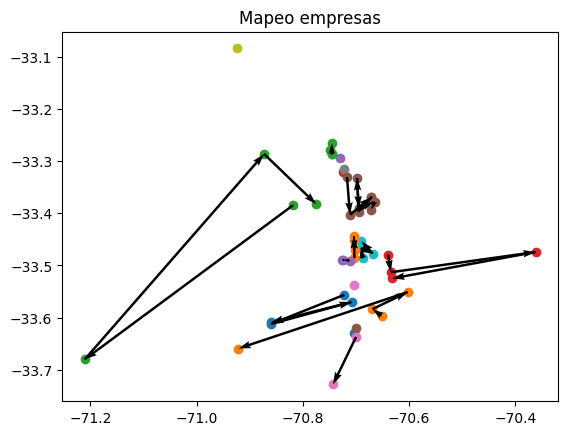

<Figure size 2000x2000 with 0 Axes>

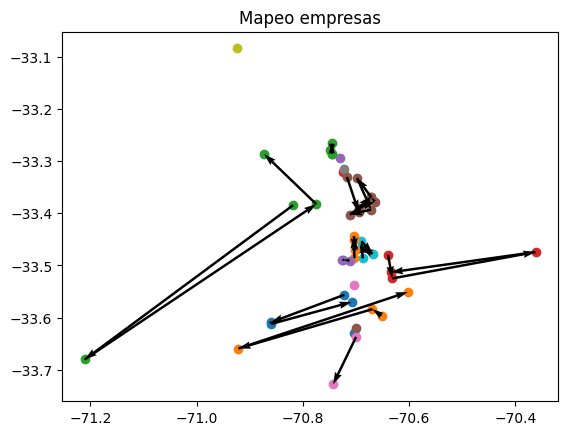

<Figure size 2000x2000 with 0 Axes>

In [90]:
#graf_interm(C,permu1)
#graf_valori(C,permu1)
graf_total(C,P)
graf_total(C,Pf)